In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
anime_data = pd.read_csv("anime.csv")
anime_rating = pd.read_csv("rating.csv")
anime_rating = anime_rating[:500]
print(anime_data.head())
print("shape of the anime dataset",anime_data.shape)
print("shape of the rating dataset",anime_rating.shape)
print(anime_rating.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
shape of the anime dataset (12294, 7)
shape of the rating dataset (500, 3)
   user_id  anime_id  rating
0        1        20      -1
1        1   

In [ ]:
print("nullvalues in anime data", anime_data.isna().sum())
print("null values in the rating data",anime_rating.isna().sum())
anime_data = anime_data.dropna(axis = 0)

nullvalues in anime data anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
null values in the rating data user_id     0
anime_id    0
rating      0
dtype: int64


In [ ]:
print("duplicate value in the anime dataset",anime_data.duplicated().sum())
print("duplicate value in the rating dataset",anime_rating.duplicated().sum())
anime_rating = anime_rating.drop_duplicates()

#merge the dataset on the basis of anime_id

anime_datafinal = pd.merge(anime_rating,anime_data,on="anime_id")
# print(anime_datafinal.shape)
# print(anime_datafinal.columns.values)
anime_datafinal= anime_datafinal.drop("rating_x",axis =1)

#print("unique genres",anime_datafinal.genre.unique())

duplicate value in the anime dataset 0
duplicate value in the rating dataset 0
(500, 9)
['user_id' 'anime_id' 'rating_x' 'name' 'genre' 'type' 'episodes'
 'rating_y' 'members']
unique genres ['Action, Comedy, Martial Arts, Shounen, Super Power'
 'Comedy, Romance, School, Shounen'
 'Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School, Seinen'
 'Action, Drama, Horror, Psychological, Romance, Seinen, Supernatural'
 'Comedy, Ecchi, Fantasy, Harem, Romance, School'
 'Action, Drama, Fantasy, Romance, School, Supernatural'
 'Action, Fantasy, Magic, Romance, Supernatural'
 'Adventure, Comedy, Drama, Historical, Shounen, Supernatural'
 'Adventure, Comedy, Drama, Fantasy, Shounen, Supernatural'
 'Adventure, Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School, Supernatural'
 'Drama, Harem, Romance' 'Action, Adventure, Comedy, Mecha, Sci-Fi'
 'Action, Mystery, Sci-Fi, Super Power' 'Action, Adventure'
 'Comedy, Ecchi, Fantasy, Harem, Romance, School, Shounen, Vampire'
 'Comedy, Ecchi, Ha

{'TV': 375, 'Movie': 56, 'OVA': 41, 'Special': 28}


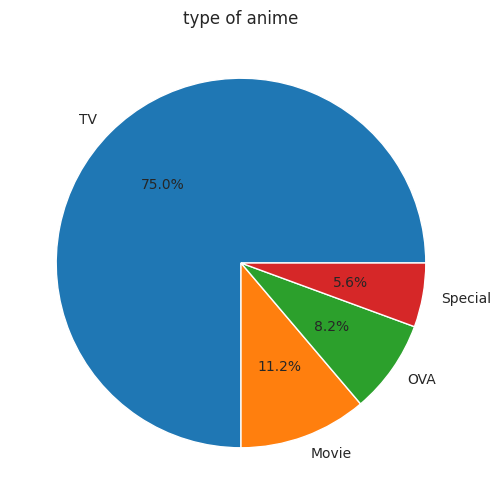

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1


In [ ]:
#create a movie and sum them
unique_type = dict(anime_datafinal["type"].value_counts())
print(unique_type)
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(unique_type.values(), labels=unique_type.keys(),autopct='%1.1f%%') # Create pie chart
plt.title("type of anime")
plt.show()

print(anime_rating.head())

In [ ]:
anime_rating.drop(anime_rating[anime_rating['rating'] == -1].index,inplace = True)
print(anime_rating.head())
#Average number of ratings per user
print(np.mean(anime_rating.groupby(['user_id']).count()['anime_id']))

     user_id  anime_id  rating
47         1      8074      10
81         1     11617      10
83         1     11757      10
101        1     15451      10
153        2     11771      10
73.0


In [ ]:
print(len(anime_rating["user_id"]))
unique_user = anime_rating["user_id"].unique()
unique_anime = anime_rating["anime_id"].unique()
user_dict ={unique_user[x] : x for x in range(len(unique_user))}
anime_dict = {index:key for key,index in enumerate(unique_anime)}
anime_rating["user_id"] = np.array(user_dict[x] for x in anime_rating["user_id"])
anime_rating["anime_id"] = np.array(anime_dict[x] for x in anime_rating["anime_id"])
#print(user_dict). # user_id = i
print(anime_rating.head())
print(anime_rating.columns)

292
    user_id anime_id  rating
47        0        0      10
81        0        1      10
83        0        2      10
101       0        3      10
153       1        4      10
Index(['user_id', 'anime_id', 'rating'], dtype='object')


In [ ]:
#generate trainable embeddings for user and anime

def create_embeddings(n, K):
    """
    Creates a random numpy matrix of shape n, K with uniform values in (0, 11/K)
    n: number of items/users
    K: number of factors in the embedding
    """
    return 11*np.random.random((n, K)) / K


def create_matrix (df, row,col):
  return sparse.csc_matrix((df["rating"].values,(df["user_id"].values,df["anime_id"].values)),shape = (row,col))

def predict(df,user_embed, anime_embed):

  predict_matrix = np.dot(user_embed, np.transpose(anime_embed))
  return predict_matrix


user_embed = create_embeddings(len(unique_user),3)
anime_embed = create_embeddings(len(unique_anime),3)
# print(np.count_nonzero(user_embed))
# print("shape of user and anime embedding",user_embed.shape,anime_embed.shape)


# csc_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
# where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k]

def pointwise_loss(df,Y,predicted):
  loss = np.power(np.sum(Y-predicted),2)/df.shape[0]
  return loss

def gradient_descent(df, Y,predicted, user_embed, anime_embed):
  grad = -2 * (Y - predicted) / df.shape[0]
  #print(grad.shape)
  #calculate gradient with respect to every weight on user and anime embedding
  grad_user = grad * anime_embed
  grad_anime = np.transpose(np.transpose(user_embed) * grad)
  #print("shape of user gradient and anime gradient",grad_user.shape,grad_anime.shape)
  return grad_user,grad_anime

def training(epochs, anime_rating,user_embed,anime_embed):
  Y = create_matrix(anime_rating, user_embed.shape[0], anime_embed.shape[0])
  #print("shape of Y",Y.shape)
  lr = 0.03
  for i in range(epochs):
    predicted = predict(anime_rating,user_embed, anime_embed)
    delta = pointwise_loss(anime_rating,Y,predicted) # just to calculate the loss
    print("Pointwise Loss for epoch {} is {}".format(i,delta))
    user_gr, anime_gr = gradient_descent(anime_rating,Y,predicted,user_embed, anime_embed)

    #update weights for user and anime embeddings

    user_embed = user_embed - lr*(user_gr)
    anime_embed = anime_embed - lr*(anime_gr)
  return predicted,user_embed,anime_embed

#train the weight embeddings by calling train function
final_pred_embed , final_user_embed,final_anime_embed = training(200,anime_rating,user_embed,anime_embed)




Pointwise Loss for epoch 0 is 102558.6722880773
Pointwise Loss for epoch 1 is 10522.152583280662
Pointwise Loss for epoch 2 is 902.1864072604973
Pointwise Loss for epoch 3 is 27.227560156966423
Pointwise Loss for epoch 4 is 11.036077291123862
Pointwise Loss for epoch 5 is 39.385248451248145
Pointwise Loss for epoch 6 is 53.417688914120106
Pointwise Loss for epoch 7 is 58.98230444318488
Pointwise Loss for epoch 8 is 61.18748789452645
Pointwise Loss for epoch 9 is 62.16218947512114
Pointwise Loss for epoch 10 is 62.6852551035329
Pointwise Loss for epoch 11 is 63.031601029986035
Pointwise Loss for epoch 12 is 63.29777069476958
Pointwise Loss for epoch 13 is 63.51822290306333
Pointwise Loss for epoch 14 is 63.705910103728584
Pointwise Loss for epoch 15 is 63.866324658180694
Pointwise Loss for epoch 16 is 64.00234602711124
Pointwise Loss for epoch 17 is 64.11591090260944
Pointwise Loss for epoch 18 is 64.20858803770408
Pointwise Loss for epoch 19 is 64.2817760113625
Pointwise Loss for epoch